<a href="https://colab.research.google.com/github/gayatridevi524/LGMVIP--DataScience-Tasks/blob/main/Stock_market_prediction_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM(Long-Short Term Memory)**

**Importing Libraries**

Here are some imports we need to make: numpy for scientific computation, matplotlib for graphing, and pandas for manipulating data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore') #ignoring warning messages during code execution

In [3]:
# Loading files from the colab
from google.colab import files
uploaded = files.upload()

Saving lstm.csv to lstm.csv


In [22]:
#reads the csv file
data = pd.read_csv("lstm.csv")
data  #prints the loaded dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [5]:
#returns the shape of the dataset
data.shape

(2035, 8)

In [6]:
#returns the structure and type of data stored
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
data.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [8]:
# returns the columns present in the data
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [9]:
# calculates the number of null values in each column of the data
data.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [10]:
# checks for the duplicated values
data.duplicated().sum()

0

Load training data set with the "Open" and "High" columns to use in our modeling.

In [11]:
training_set = data.iloc[:, 1:2].values

**Data Preprocessing**

Normalization is changing the values of numeric columns in the dataset to a common scale, which helps the performance of our model. To scale the training dataset we use Scikit-Learn’s MinMaxScaler with numbers between 0 and 1.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(training_set)

We should input our data in the form of a 3D array to the LSTM model. First, we create data in 60 timesteps before using numpy to convert it into an array. Finally, we convert the data into a 3D array with X_train samples, 60 timestamps, and one feature at each step.

In [13]:
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(scaled_data[i-60:i, 0])
    y_train.append(scaled_data[i, 0])

In [14]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

**Creating the LSTM Model**

In [15]:
# Make the necessary imports from keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

These lines import the necessary classes from Keras to define the model: LSTM for LSTM layers, Dropout for dropout regularization, and Dense for fully connected layers. The Sequential class is used to create a sequential stack of layers.

The model starts with an LSTM layer with 50 units, return_sequences=True indicates that this layer returns sequences as output. The input_shape specifies the shape of input data: (sequence_length, 1).

A Dropout layer with a dropout rate of 20% is added to prevent overfitting.

The same pattern repeats for the next two LSTM layers and Dropout layers.

The last LSTM layer doesn't have return_sequences=True, so it doesn't return sequences but rather single outputs.

A Dense layer with 1 unit is added. This is the output layer that produces the final prediction.

To compile our model we use the rmsprop optimizer and set the loss as the mean_squared_error. After that, we fit the model to run for 100 epochs (the epochs are the number of times the learning algorithm will work through the entire training set) with a batch size of 32.

In [16]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),

    LSTM(units=50, return_sequences=True),
    Dropout(0.2),

    LSTM(units=50, return_sequences=True),
    Dropout(0.2),

    LSTM(units=50),
    Dropout(0.2),

    Dense(units=1)
])

model.compile(optimizer='rmsprop', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
62/62 [==============================] - 19s 145ms/step - loss: 0.0095
Epoch 2/100
62/62 [==============================] - 10s 159ms/step - loss: 0.0045
Epoch 3/100
62/62 [==============================] - 10s 163ms/step - loss: 0.0041
Epoch 4/100
62/62 [==============================] - 8s 137ms/step - loss: 0.0038
Epoch 5/100
62/62 [==============================] - 10s 161ms/step - loss: 0.0030
Epoch 6/100
62/62 [==============================] - 9s 151ms/step - loss: 0.0031
Epoch 7/100
62/62 [==============================] - 10s 163ms/step - loss: 0.0023
Epoch 8/100
62/62 [==============================] - 9s 142ms/step - loss: 0.0028
Epoch 9/100
62/62 [==============================] - 10s 159ms/step - loss: 0.0025
Epoch 10/100
62/62 [==============================] - 11s 178ms/step - loss: 0.0025
Epoch 11/100
62/62 [==============================] - 12s 202ms/step - loss: 0.0022
Epoch 12/100
62/62 [==============================] - 10s 154ms/step - loss: 0.0022
Epoc

**Import the test set for the model to make predictions**

In [18]:
# importing the test set
from google.colab import files
uploaded = files.upload()

Saving lstm_test.csv to lstm_test (1).csv


In [23]:
#reads the csv file
data_test = pd.read_csv("lstm_test.csv")

Before predicting future stock prices, we have to modify the test set then merge the training set and the test set on the 0 axis, set 60 as the time step again, use MinMaxScaler, and reshape data. Then, inverse_transform puts the stock prices in a normal readable format.

In [24]:
# Concatenate train and test data
dataset_total = pd.concat((data['Open'], data_test['Open']), axis=0)

# Scale the combined dataset
scaled_data_total = sc.transform(dataset_total.values.reshape(-1, 1))

# Prepare test input sequences
X_test = []
sequence_length = 60  # Should match the sequence length used during training
for i in range(len(dataset_total) - len(data_test), len(dataset_total)):
    X_test.append(scaled_data_total[i-sequence_length:i, 0])
X_test = np.array(X_test)

# Reshape the input for the LSTM model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predicted_stock_price = model.predict(X_test)

# Transform predictions back to original scale
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


1/1 [==============================] - 2s 2s/step


**Plotting the Results**

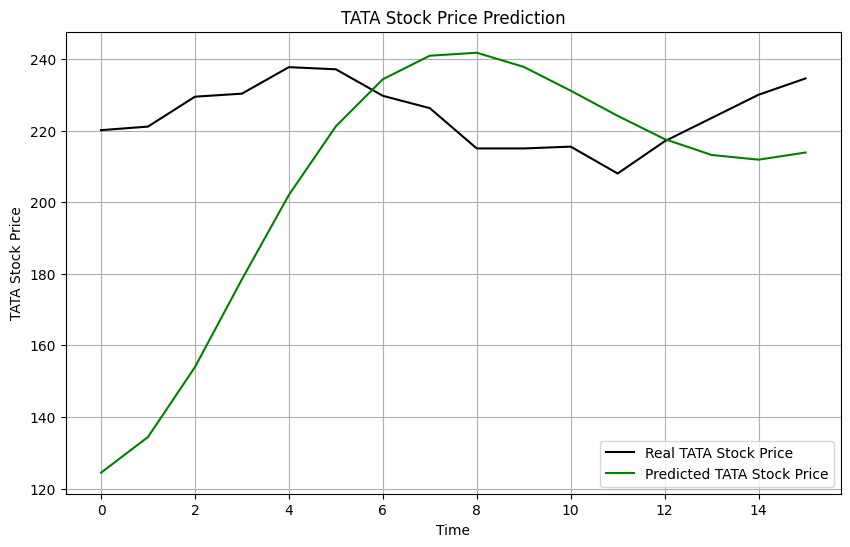

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot real stock prices
plt.plot(data_test['Open'].values, color='black', label='Real TATA Stock Price')

# Plot predicted stock prices
plt.plot(predicted_stock_price, color='green', label='Predicted TATA Stock Price')

plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()


Based on the graph, the conclusion after predicting the stock price is that the stock price of TATA is likely to increase in the near future.
While the exact price points from our predicted price weren’t always close to the actual price, our model did still indicate overall trends such as going up or down. This project teaches us the LSTMs can be somewhat effective in times series forecasting.